In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
rng=np.random.default_rng()

假阳性: 某种试剂用于癌症的检测，阳性检出率为90%，即 $P(+|Cancer) = 0.9$，误检率为10%，即 $P(+|no Cancer) = 0.1$。假设人群中癌症患者的比例为百分之一，即 $P(Cancer) = 0.01$。求测出阳性的检测正确率，即 $P(Cancer|+)$。
    用贝叶斯定理可以很容易得到 $$P(Cancer|+) = \frac{P(+|Cancer)P(Cancer)}{P(+)} = \frac{P(+|Cancer)P(Cancer)}{P(+|Cancer)P(Cancer) + P(+|no Cancer)P(no Cancer)} = \frac{0.9 * 0.01}{0.1 * 0.99 + 0.9 * 0.01}\approx 0.08$$

模拟一个随机过程来检验一下这个结果

In [3]:
def cancer_test(flag):  # flag 表示被测者是否患有癌症
    ran = rng.random()
    if flag and ran < 0.9:
        return True
    elif not flag and ran < 0.1:
        return True
    else:
        return False

In [4]:
ran = rng.random(size=10000)
people_states = np.array([True if ran[i] < 0.01 else False for i in range(len(ran))])

In [5]:
test_results = []
for s in people_states:
    test_results.append(cancer_test(s))
test_results = np.array(test_results)

In [6]:
cancer_result =  test_results[people_states]  # 患癌的人的检测结果
cancer_result

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True])

In [7]:
# 测出阳性的检测正确率,正确率很低，说明假阳性的概率很高
p_true_positive = len(cancer_result[cancer_result]) / len(test_results[test_results])
print(p_true_positive)

0.08598130841121496


In [8]:
# 对第一个检测出阳性的人在进行一次检测
people_first_true_states = people_states[test_results]
second_test_results = []
for s in people_first_true_states:
    second_test_results.append(cancer_test(s))
second_test_results = np.array(second_test_results)

In [9]:
cancer_result =  second_test_results[people_first_true_states]  # 患癌的人的第二次的检测结果
cancer_result

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [10]:
# 两次测出阳性的检测正确率,相比于只做一次检测，正确率提升很多
p_true_positive = len(cancer_result[cancer_result]) / len(second_test_results[second_test_results])
print(p_true_positive)

0.4153846153846154


《应用随机过程：概率论模型导论》Sheldon M.Ross著 例2.53

In [11]:
def move(current_state, n):
    u = rng.random()
    if u > 0.5:
        current_state = current_state + 1
    else:
        current_state = current_state - 1
    if current_state == -1:
        return n-1
    elif current_state == n:
        return 0
    else:
        return current_state

In [12]:
state = 0
last_state = -1  # 直到访问完所有状态，记录最后一个访问的状态
visited_states = [0]
num_states = 5
for i in range(20):
    state = move(state, num_states)
    print(state)
    if not (state in visited_states):
        visited_states.append(state)
    else:
        pass
    if len(visited_states) == num_states:
        last_state  = state
        print(last_state)
        break
    else:
        pass
    

4
0
1
2
1
0
1
2
3
3


In [13]:
last_states=[]
for i in range(10000):
    state = 0
    visited_states = [0]
    for j in range(20):
        state = move(state, num_states)
        if not (state in visited_states):
            visited_states.append(state)
        else:
            pass
        if len(visited_states) == num_states:
            last_states.append(state)
            break
        else:
            pass

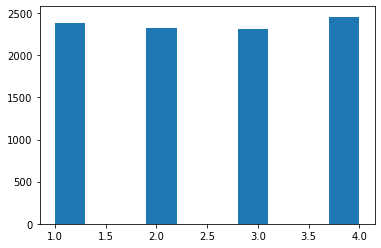

In [14]:
# 出来初始状态，每一个状态都等可能是最后一个状态
plt.hist(last_states)
plt.show()

《应用随机过程：概率论模型导论》Sheldon M.Ross著 11.5节介绍了一个对于n个（0，1）均匀随机变量的排序，理论上运行时间与n成正比（比最好的通用排序算法的nln(n)更好）。但是在这个测试的例子中并不是这样，所以Ross的这个方案是否真的更优目前对于我存疑。

In [15]:
n = 10000
random_variables = []
lists = [[] for i in range(n)]
for i in range(n):
    u = rng.random()
    random_variables.append(u)
    index = np.floor(u * n).astype(int)
    lists[index].append(u)

In [16]:
start_time = time.time()
sorted_random_variables = sorted(random_variables)
end_time = time.time()
print(end_time - start_time)

0.0010089874267578125


In [17]:
start_time = time.time()
combined = sum(lists, [])
end_time = time.time()
print(end_time - start_time)

0.10610604286193848


In [18]:
start_time = time.time()
combine_sorted = sum([sorted(sublist) for sublist in lists], [])
end_time = time.time()
print(end_time - start_time)

0.10250735282897949
